In [54]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import pycbc
from pycbc import conversions, psd, filter, noise, types
from pycbc.waveform import get_fd_waveform, get_td_waveform
import matplotlib.pyplot as plt
import numpy as np

### Generate TD and FD waveform

In [206]:
dt = 1.0/2048
df = 1.0/8
length = int(1/df/dt)
f_lower = 15.0

mass1 = 60
mass2 = 60
distance = 80
ecc = 10.0

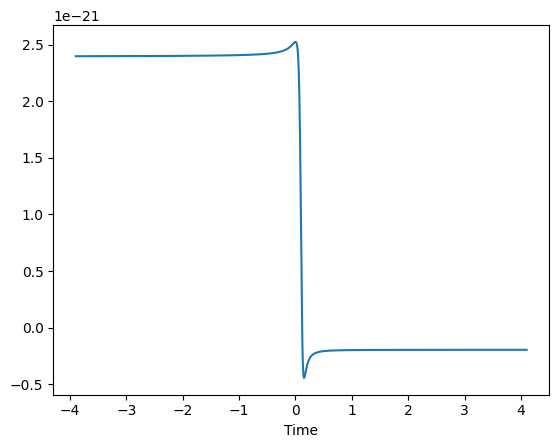

In [213]:
hp_td, hc_td = get_td_waveform(approximant="Hyperbolic15PNhphc",
                         mass1 = mass1, mass2 = mass2, f_lower=f_lower,
                         delta_t=dt, delta_f=df, Phi0=3.14, xi0=0.0005, vmax=0.5, duration=int(1/df),
                         spin1_a=1.0, spin1_polar=0.5, spin1_azimuthal=0.35, spin2_a=1, spin2_polar=0.8, spin2_azimuthal=1, distance=distance, inclination=1.0, eccentricity=ecc)

plt.plot(hp_td.sample_times, hp_td)
plt.xlabel('Time')
plt.show()

/Users/rahul/.pyenv/versions/mygpu/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/rahul/.pyenv/versions/mygpu/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


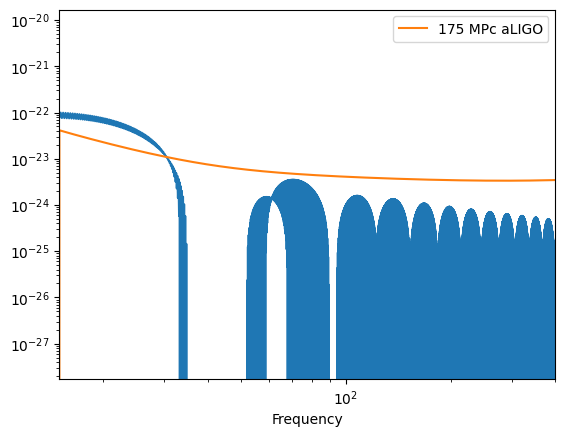

In [186]:
PSD = psd.analytical.aLIGO175MpcT1800545(int(length/2+1), df, low_freq_cutoff=f_lower)

hp_fd, hc_fd = get_fd_waveform(approximant="Hyperbolic15PNhphc",
                         mass1 = mass1, mass2 = mass2, f_lower=f_lower,
                         delta_t=dt, delta_f=df, Phi0=0.3, xi0=0.0005, vmax=0.5, duration=int(1/df),
                         spin1_a=1, spin1_polar=0.5, spin1_azimuthal=0.35, spin2_a=1, spin2_polar=0.8, spin2_azimuthal=1, distance=distance, inclination=2, eccentricity=1.5)

plt.loglog(hp_fd.sample_frequencies, hp_fd)
plt.xlabel('Frequency')
plt.xlim([15,400])
plt.loglog(PSD.sample_frequencies, np.sqrt(PSD), label='175 MPc aLIGO')
plt.legend()

In [187]:
nt = noise.gaussian.noise_from_psd(len(hp_td), dt, PSD)
nt = types.timeseries.TimeSeries(nt, dt, epoch=hp_td.start_time)

data = nt + hp_td

snr = np.abs(filter.matched_filter(hp_fd, data, PSD, low_frequency_cutoff=15))[0]
print('SNR: ', snr)

SNR:  10.16339786804274


### Whitening

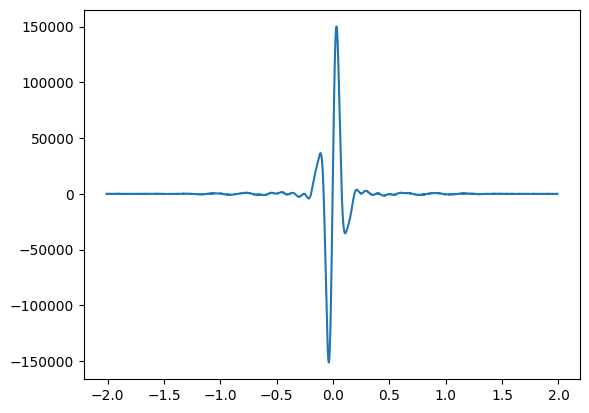

In [165]:
nt = noise.gaussian.noise_from_psd(len(hp_td), dt, PSD)
nt = types.timeseries.TimeSeries(nt, dt, epoch=-4.008789062)

data = nt + hp_td

nt_fd = nt.to_frequencyseries()
data_whiten = data.whiten(2,4)

#plt.loglog(nt_fd.sample_frequencies, nt_fd)
#plt.plot(PSD.sample_frequencies, PSD)

plt.plot(data_whiten.sample_times, data_whiten)